<a href="https://colab.research.google.com/github/AnjaliRaj015/Practical-AI-Bootcamp/blob/main/Tasks/Anjali-Rajendran/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.6.0


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

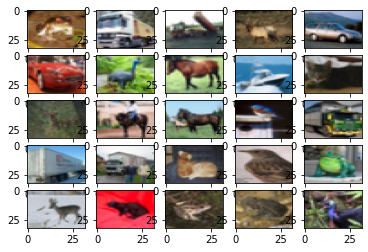

In [4]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [5]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16,

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2342 - accuracy: 0.9184 - val_loss: 0.4544 - val_accuracy: 0.8625
Epoch 2/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.1579 - accuracy: 0.9451 - val_loss: 0.5024 - val_accuracy: 0.8544
Epoch 3/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1298 - accuracy: 0.9544 - val_loss: 0.5583 - val_accuracy: 0.8565
Epoch 4/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1104 - accuracy: 0.9623 - val_loss: 0.6005 - val_accuracy: 0.8543
Epoch 5/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1031 - accuracy: 0.9654 - val_loss: 0.5810 - val_accuracy: 0.8496
Epoch 6/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0933 - accuracy: 0.9685 - val_loss: 0.6628 - val_accuracy: 0.8376
Epoch 7/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0871 - accuracy: 0.9712 - val_loss: 0.6047 -

In [10]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.4714 - accuracy: 0.8485 - val_loss: 0.5181 - val_accuracy: 0.8342
Epoch 2/15
1562/1562 [==============================] - 51s 32ms/step - loss: 0.3871 - accuracy: 0.8718 - val_loss: 0.4360 - val_accuracy: 0.8570
Epoch 3/15
1562/1562 [==============================] - 51s 33ms/step - loss: 0.3537 - accuracy: 0.8819 - val_loss: 0.4439 - val_accuracy: 0.8505
Epoch 4/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.3339 - accuracy: 0.8866 - val_loss: 0.4744 - val_accuracy: 0.8510
Epoch 5/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.3252 - accuracy: 0.8892 - val_loss: 0.4072 - val_accuracy: 0.8666
Epoch 6/15
1562/1562 [==============================] - 51s 32ms/step - loss: 0.3155 - accuracy: 0.8933 - val_loss: 0.4181 - val_accuracy: 0.8656
Epoch 7/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.2992 - accuracy: 0.8979 - val_loss: 0.4614 -

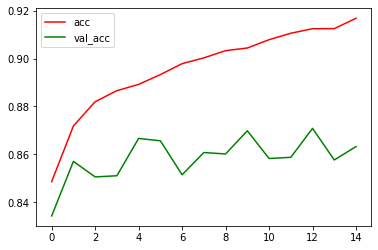

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

Original label is cat and predicted label is cat


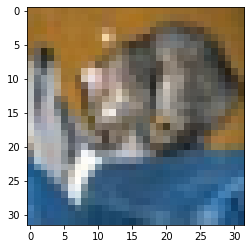

In [15]:
# label mapping
 
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
# select the image from our test dataset
image_number = 0
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/tinkerhub/'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/tinkerhub


In [25]:
# save the model
model.save('cifar_10.h5')
